# Libs

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import calendar



# Read data

In [2]:
path_venda = r"./data/venda.csv"
path_receita = r"./data/receita.csv"

In [3]:
df_receita = pd.read_csv(path_receita)
df_venda = pd.read_csv(path_venda)

# Análise exploratória

## Análise exploratória receita

In [39]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,65.300
1,2019,1,72,57,4,1360.235
2,2019,1,72,56,3,276.490
3,2019,1,72,47,2,-1707.095
4,2019,1,72,38,3,1080.745


### Fix receita float

In [5]:
df_receita['receita'] = df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [6]:
df_receita

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,65.300
1,2019,1,72,57,4,1360.235
2,2019,1,72,56,3,276.490
3,2019,1,72,47,2,-1707.095
4,2019,1,72,38,3,1080.745
...,...,...,...,...,...,...
1075,2020,6,72,14,1,98.935
1076,2020,6,72,13,3,3244.695
1077,2020,6,72,12,3,267.235
1078,2020,6,72,9,12,2157.955


## Estatísticas descritivas

In [7]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1080 non-null   int64  
 1   mes           1080 non-null   int64  
 2   seguradora    1080 non-null   int64  
 3   vendedor      1080 non-null   int64  
 4   tot_apolices  1080 non-null   int64  
 5   receita       1080 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 50.8 KB


In [8]:
df_receita.describe()

,ano,mes,seguradora,vendedor,tot_apolices,receita
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000
mean,2019.352778,5.695370,56.596296,29.499074,3.32963,1201.460574
std,0.478056,3.195626,18.292495,17.801292,3.61808,4632.482693
min,2019.000000,1.000000,4.000000,1.000000,1.00000,-4622.065000
25%,2019.000000,3.000000,44.000000,16.000000,1.00000,109.560000
50%,2019.000000,5.000000,66.000000,20.000000,2.00000,309.747500
75%,2020.000000,8.000000,72.000000,43.000000,4.00000,959.635000
max,2020.000000,12.000000,83.000000,59.000000,34.00000,125950.595000


## Receita por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

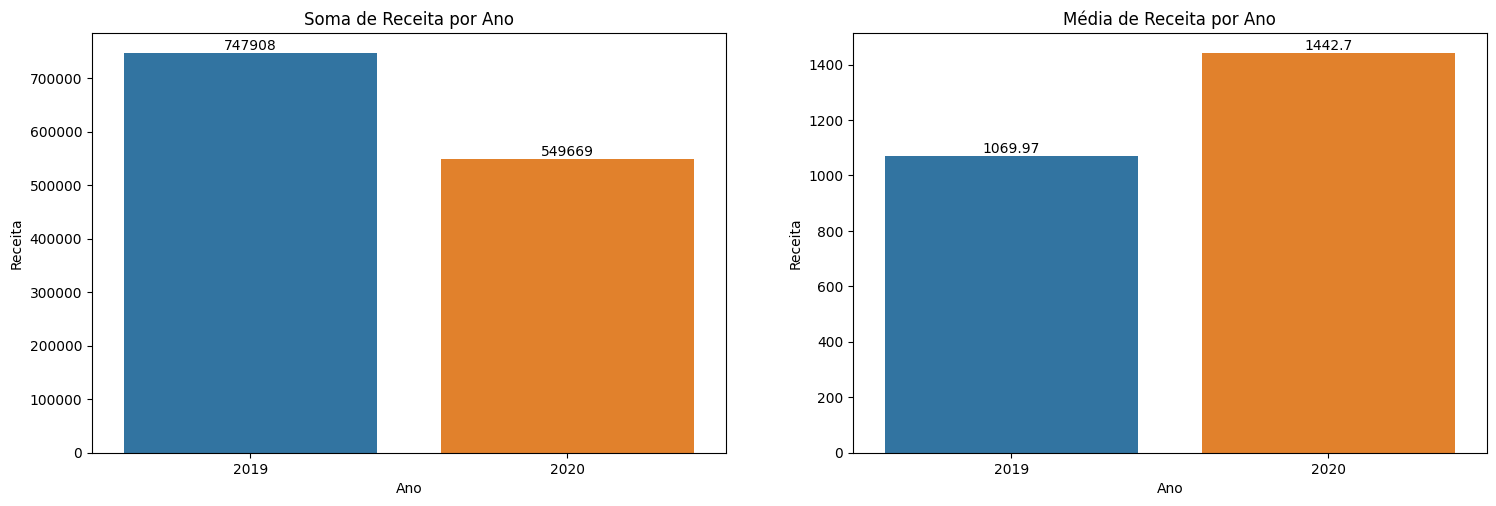

In [9]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


In [10]:
df_receita.groupby('ano').count()['mes']
# Em 2019 tivemos mais vendas com valores menores.

ano
2019    699
2020    381
Name: mes, dtype: int64

## Receita por mês

[Text(0, 0, '1037.16'),
 Text(0, 0, '1180.85'),
 Text(0, 0, '1102.68'),
 Text(0, 0, '1181.96'),
 Text(0, 0, '1119.6'),
 Text(0, 0, '1282.42'),
 Text(0, 0, '839.524'),
 Text(0, 0, '936.652'),
 Text(0, 0, '1212.91'),
 Text(0, 0, '856.737'),
 Text(0, 0, '794.666'),
 Text(0, 0, '3528.83')]

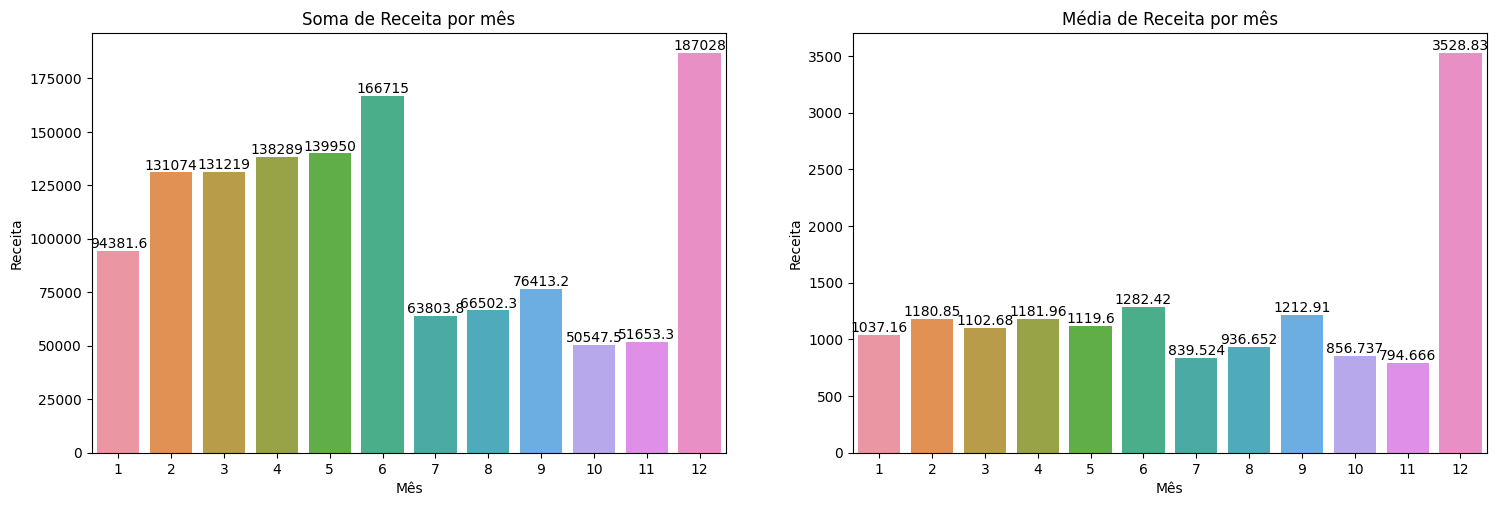

In [11]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('mes').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Soma de Receita por mês')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('mes').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Média de Receita por mês')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


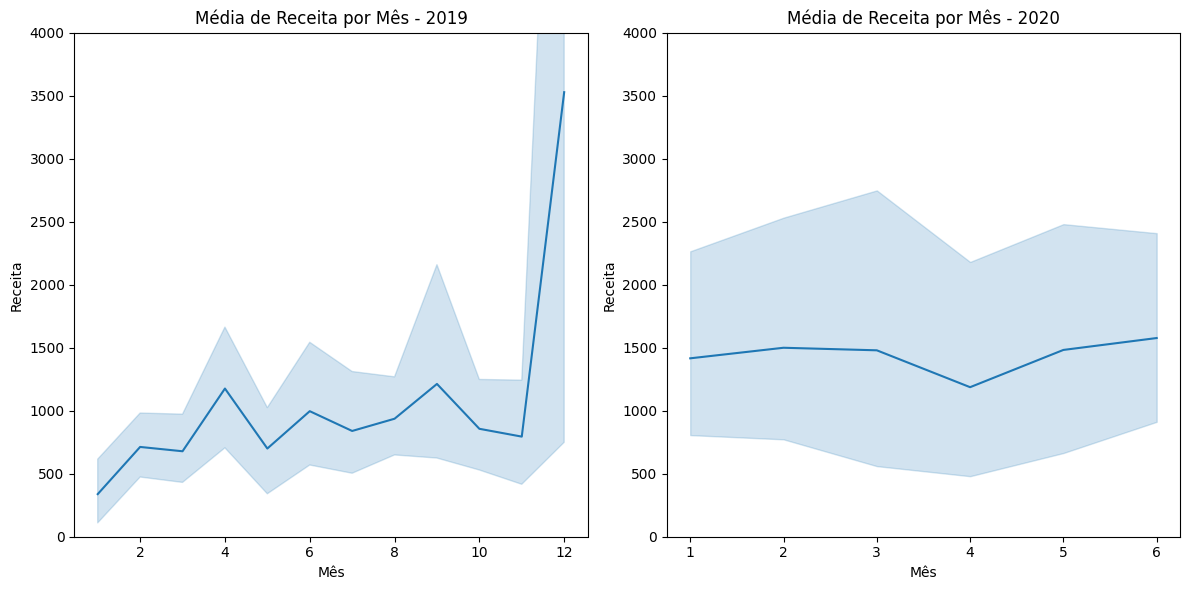

In [12]:
# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.lineplot(x='mes', y='receita', data=dados_2019, ax=axes[0])
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Receita')
axes[0].set_title('Média de Receita por Mês - 2019')
axes[0].set(ylim=(0, 4000))

# Plotar gráfico para 2020
sns.lineplot(x='mes', y='receita', data=dados_2020, ax=axes[1])
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Em 2019 a média da receita foi bem mais estável
# Pq esse pico em dezembro de 2019? Era esperado? 

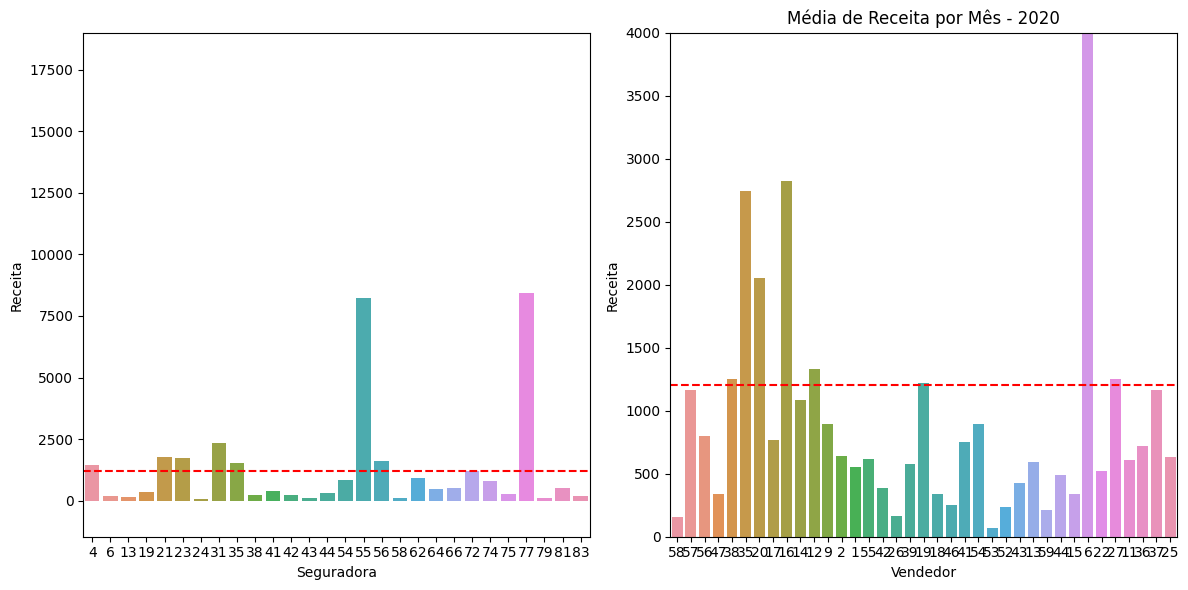

In [25]:
df_receita['vendedor'] = df_receita['vendedor'].astype(str)

# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes[0], errwidth=0)
axes[0].set_xlabel('Seguradora')
axes[0].set_ylabel('Receita')
# axes[0].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[0].axhline(mean_receita, color='r', linestyle='--', label='Média')

# Plotar gráfico para 2020
sns.barplot(x='vendedor', y='receita', data=df_receita, ax=axes[1], errwidth=0)
axes[1].set_xlabel('Vendedor')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[1].axhline(mean_receita, color='r', linestyle='--', label='Média')


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Passar uma linha média para ver quem está abaixo ou acima da média.
# Destacar ?

In [ ]:
(
    df_receita[
        (df_receita['seguradora'].isin([55, 77])) &
        (df_receita['ano'] == 2020)]
    [['receita', 'seguradora']]
    .groupby('seguradora').sum()
)

,receita
seguradora,
55,93040.745
77,26450.000


In [30]:
vendedores_acima_media = df_receita[df_receita['receita'] > mean_receita].nlargest(3, 'receita')

# Imprimir os vendedores acima da média de renda
print("Vendedores acima da média de renda:")
for index, row in vendedores_acima_media.iterrows():
    print(row['vendedor'], row['receita'])

Vendedores acima da média de renda:
16 125950.595
20 30301.38
20 26450.0


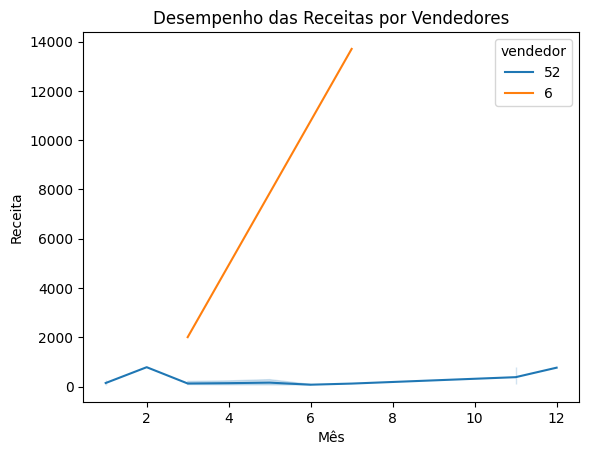

In [27]:
# Plotar gráfico usando Seaborn
sns.lineplot(x='mes', y='receita', hue='vendedor', data=df_receita[df_receita['vendedor'].isin(['6', '61', '73', '52'])])

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Desempenho das Receitas por Vendedores')

# Exibir o gráfico
plt.show()

# [df_receita['seguradora'].isin([55, 56, 77])]

In [23]:
df_receita[df_receita['vendedor'].isin([6, 61, 73, 53])]['vendedor'].unique()

array([53,  6], dtype=int64)

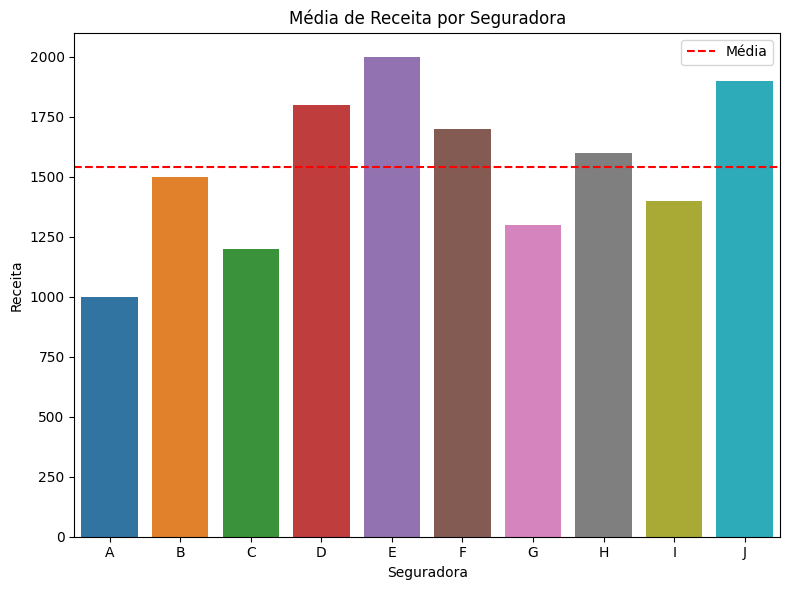

In [ ]:
# # Dados de exemplo
# dados = {
#     'seguradora': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
#     'receita': [1000.0, 1500.0, 1200.0, 1800.0, 2000.0, 1700.0, 1300.0, 1600.0, 1400.0, 1900.0]
# }

# # Criar DataFrame do Pandas
# df_receita = pd.DataFrame(dados)

# # Criar figura e eixos dos subplots
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# # Plotar gráfico para 2019
# sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes, errwidth=0)

# # Traçar a linha da média da receita
# mean_receita = df_receita['receita'].mean()
# axes.axhline(mean_receita, color='r', linestyle='--', label='Média')

# # Configurações do gráfico
# axes.set_xlabel('Seguradora')
# axes.set_ylabel('Receita')
# axes.set_title('Média de Receita por Seguradora')
# axes.legend()

# # Ajustar espaçamento entre os subplots
# plt.tight_layout()

# # Exibir o gráfico
# plt.show()

## Total receita

In [114]:
df_receita['tot_receita'] = df_receita['tot_apolices']*df_receita['receita']

# Análise exploratória vendas

In [42]:
df_venda.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda
0,2019,1,66,1,1,"174,055"
1,2019,1,31,58,1,"92,31"
2,2019,1,72,35,6,"900,08"
3,2019,1,55,20,1,7550
4,2019,1,72,58,2,"84,175"


## Estatísticas descritivas

In [59]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           1242 non-null   int64 
 1   mes           1242 non-null   int64 
 2   seguradora    1242 non-null   int64 
 3   vendedor      1242 non-null   int64 
 4   tot_apolices  1242 non-null   int64 
 5   venda         1238 non-null   object
dtypes: int64(5), object(1)
memory usage: 58.3+ KB


## Fix valor venda para float

In [65]:
for i in df_venda['venda']:
    if type(i) != str:
        print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [72]:
df_venda['venda'] = df_venda['venda'].fillna('0.0').apply(lambda x: x.replace(',', '.')).astype('float')

In [73]:
df_venda.describe()

,ano,mes,seguradora,vendedor,tot_apolices,venda
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,2019.359903,5.566023,55.528986,28.516103,3.416264,1261.065845
std,0.480165,3.261018,19.054768,17.278731,3.798065,6876.514842
min,2019.000000,1.000000,4.000000,1.000000,1.000000,-61874.485000
25%,2019.000000,3.000000,44.000000,16.000000,1.000000,90.246250
50%,2019.000000,5.000000,66.000000,20.000000,2.000000,253.110000
75%,2020.000000,8.000000,72.000000,42.000000,4.000000,840.222500
max,2020.000000,12.000000,83.000000,59.000000,36.000000,148598.290000


## Vendas por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

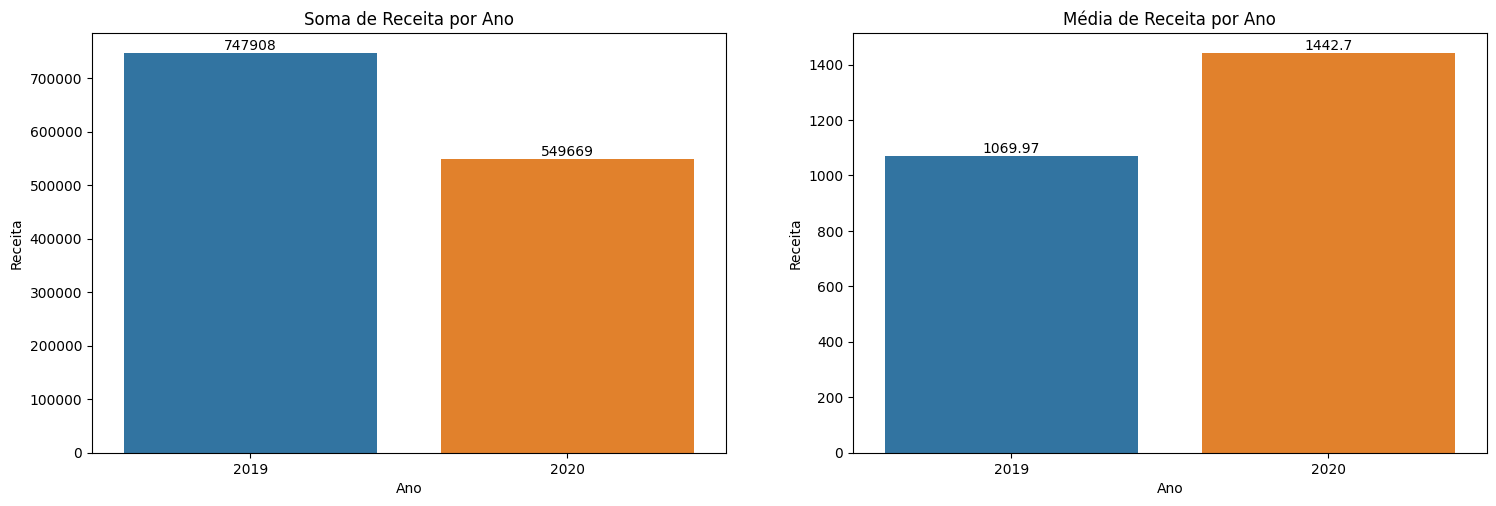

In [75]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


## Vendas por mês

[Text(0, 0, '2557.55'),
 Text(0, 0, '805.211'),
 Text(0, 0, '771.252'),
 Text(0, 0, '615.261'),
 Text(0, 0, '1260.68'),
 Text(0, 0, '1365.1'),
 Text(0, 0, '716.421'),
 Text(0, 0, '1659.56'),
 Text(0, 0, '556.94'),
 Text(0, 0, '953.93'),
 Text(0, 0, '855.095'),
 Text(0, 0, '2865.98')]

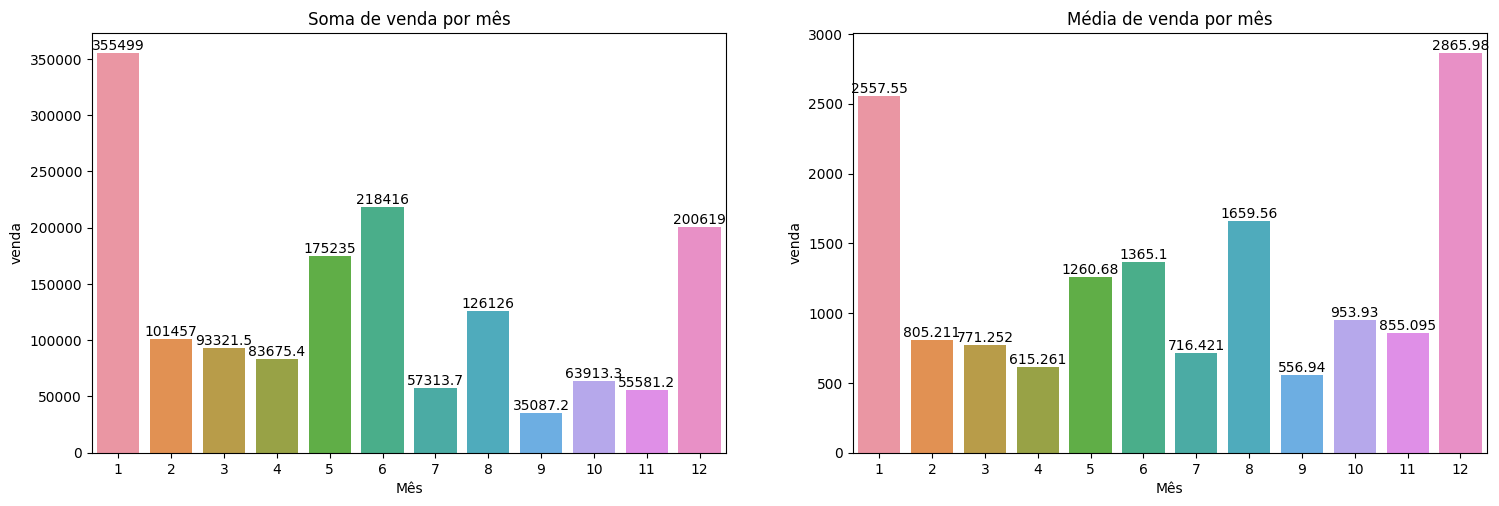

In [74]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_venda.groupby('mes').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('venda')
plt.title('Soma de venda por mês')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_venda.groupby('mes').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('venda')
plt.title('Média de venda por mês')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


# Vendedores e seguradora para string

In [78]:
df_venda['vendedor'] = df_venda['vendedor'].astype(str)
df_venda['seguradora'] = df_venda['seguradora'].astype(str)
df_venda.dtypes





ano               int64
mes               int64
seguradora       object
vendedor         object
tot_apolices      int64
venda           float64
dtype: object

# Mês por extenso

In [107]:
df_venda['month_name'] = df_venda['mes'].apply(lambda x:  calendar.month_name[x])
df_receita['month_name'] = df_receita['mes'].apply(lambda x:  calendar.month_name[x])

df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [98]:
df_venda.columns

Index(['ano', 'mes', 'seguradora', 'vendedor', 'tot_apolices', 'venda',
       'month_name'],
      dtype='object')

# Exportando dados

## Dados de vendas

In [106]:
df_venda.to_csv(r"./data/df_venda.csv", sep=';', decimal=',')

In [103]:
valor1 = df_venda[df_venda['ano']==2019]['venda'].sum()
valor2 = df_venda[df_venda['ano']==2019]['tot_apolices'].sum()
valor1*valor2

2605059423.45

In [105]:
df_venda['total_venda'] = df_venda['tot_apolices']*df_venda['venda']

## Dados de receita

In [108]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita,month_name
0,2019,1,72,58,1,65.300,January
1,2019,1,72,57,4,1360.235,January
2,2019,1,72,56,3,276.490,January
3,2019,1,72,47,2,-1707.095,January
4,2019,1,72,38,3,1080.745,January


In [113]:
df_receita.to_csv(r"./data/df_receita.csv", sep=';', decimal=',')